In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.shape

(1143, 13)

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

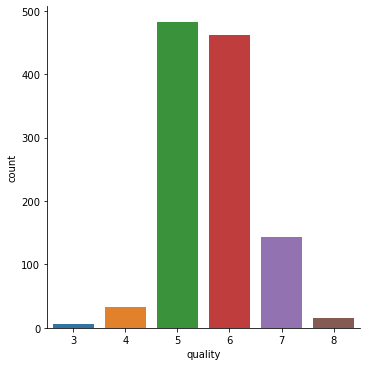

In [7]:
sns.catplot(x='quality',data=df,kind='count')

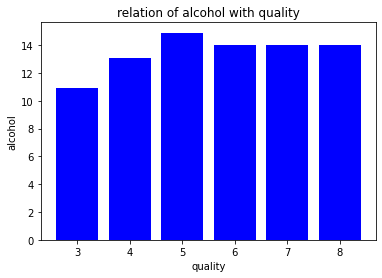

In [9]:
plt.bar(df['quality'], df['alcohol'], color = 'blue')
plt.title('relation of alcohol with quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

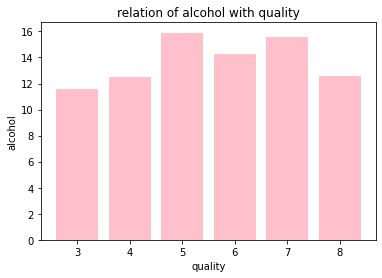

In [10]:
plt.bar(df['quality'], df['fixed acidity'], color = 'pink')
plt.title('relation of alcohol with quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

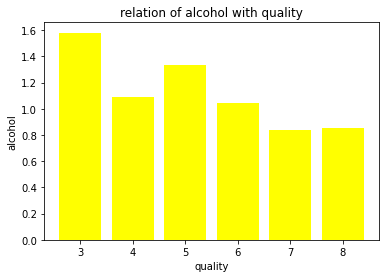

In [11]:
plt.bar(df['quality'], df['volatile acidity'], color = 'yellow')
plt.title('relation of alcohol with quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show() #inversely proportional

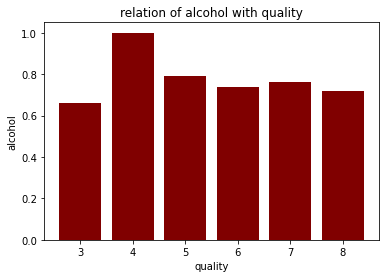

In [12]:
plt.bar(df['quality'], df['citric acid'], color = 'maroon')
plt.title('relation of alcohol with quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [13]:
correl=df.corr()

<AxesSubplot:>

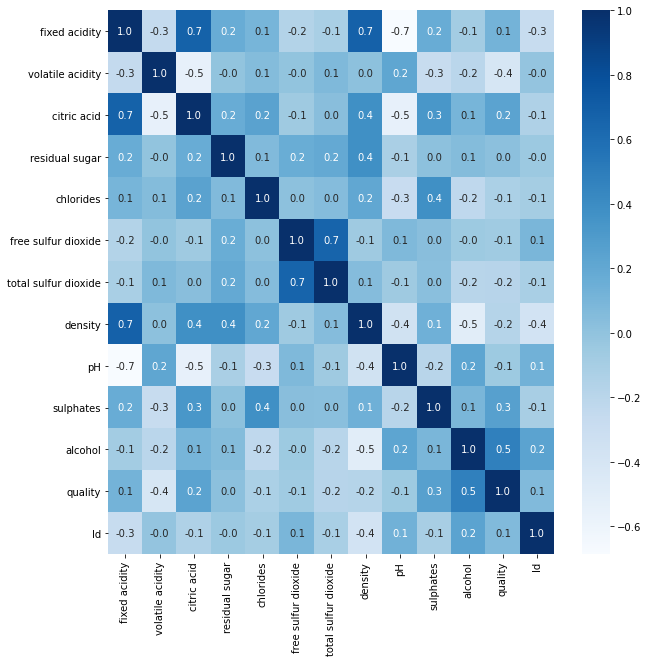

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correl,cmap='Blues',fmt='.1f',annot=True)

In [15]:
y=df.drop('quality',axis=1)

In [16]:
#label binarisation
Z=df['quality'].apply(lambda z_value:1 if z_value>=7 else 0)
print(Z)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
x_train,x_test,y_train,y_test=train_test_split(y,Z,test_size=0.2,random_state=3)

In [19]:
print(y_train.shape,y_test.shape)

(914,) (229,)


In [20]:
#Random forest model
model=RandomForestClassifier()

In [21]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
x_test_predict=model.predict(x_test)
test_accuracy=accuracy_score(x_test_predict,y_test)

In [23]:
print(test_accuracy)

0.9170305676855895


In [24]:
inputdata=(8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5,16)
idas_numpyarr=np.asarray(inputdata)
inputdata_reshape=idas_numpyarr.reshape(1,-1)
prediction=model.predict(inputdata_reshape)
print(prediction)
if (prediction[0]==0):
    print("bad quality wine")
else:
    print("good quality wine")

[1]
good quality wine


In [29]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_train, y_train)

C:\Users\THANMAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
x_test_pre = model.predict(x_test)
testaccuracy=accuracy_score(x_test_pre,y_test)
print("test accuracy is",testaccuracy)

test accuracy is 0.8733624454148472


In [36]:
#using support vector machines
from sklearn.svm import SVC
model = SVC()

In [38]:
model.fit(x_train,y_train)

SVC()

In [39]:
x_test_pred = model.predict(x_test)
print("Testing accuracy :",accuracy_score(x_test_pred, y_test))

Testing accuracy : 0.834061135371179
